In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

import sqlite3

import requests
from bs4 import BeautifulSoup

import os
import sys

import plotly.express as px
import plotly.graph_objects as go

from plotly.data import experiment, stocks, gapminder
from plotly.subplots import make_subplots

import esparto as es



# 1. Moc osiągalna w Polsce 

In [2]:
page = es.Page(title='Analiza rezerwy mocy w KSE')

In [3]:
page['Opis analizy'] = f"""Niniejsza analiza ma na celu zbadanie poziomu nadwyżek mocy w Polskim 
systemie elektroenergetycznym w roku 2023 na podstawie 5-letniego Planu koordynacyjnego udostępnionego 
przez Polskie Sieci Elektroenergetyczne (PSE). Dane przedstawiają plan pracy KSE na rok 2023 z krokiem 
1-godzinnym. Opis objął macierz danych (8760 wierszy odpowiadających godzinom), w tym między innymi: 
prognozowane zapotrzebowanie sieci, wymagana rezerwa mocy, nadwyżka mocy dostępne dla OSP, mocy 
dyspozycyjna i generacja Jednostek Wytwórczych i magazynów energii, generacja źródeł wiatrowych 
i fotowoltaicznych, saldo wymiany międzynarodowej. 
Dane zostały pobrane ze strony pse.pl w dniu 05.03.2023, co oznacza, że dla dwóch pierwszych miesięcy roku prognozowane wartości będą 
zbliżone do rzeczywistych """

In [4]:
page.save_html('Analiza rezerwy mocy w KSE.html')

In [5]:
moc_os_dict = {"elektrownie": ["węgiel kamienny", 
                               "węgiel brunatny",
                               "gazowe" , "wodne", 
                               "wiatrowe", 
                               "biogaz/biomasa", 
                               "słoneczne", 
                               "inne"],
            "moc 2020": [24289.532, 
                         8456.4,
                         3154.949,
                         2403.5,
                         6347.651,
                         1055.653,
                         3960.042,
                         574.1],
             "moc 2021": [23031.472, 
                          8397.4, 
                          3309.409, 
                          2406.9, 
                          7007.697, 
                          1069.004, 
                          7681.368, 
                          574.1  ], 
              "moc 2022": [22436.344, 
                           8269.4,
                           3845.905,
                           2408.2,
                           8129.465,
                           1120.998,
                           12114.696,
                           574.1 ], 
}

In [6]:
moc_os_dict

{'elektrownie': ['węgiel kamienny',
  'węgiel brunatny',
  'gazowe',
  'wodne',
  'wiatrowe',
  'biogaz/biomasa',
  'słoneczne',
  'inne'],
 'moc 2020': [24289.532,
  8456.4,
  3154.949,
  2403.5,
  6347.651,
  1055.653,
  3960.042,
  574.1],
 'moc 2021': [23031.472,
  8397.4,
  3309.409,
  2406.9,
  7007.697,
  1069.004,
  7681.368,
  574.1],
 'moc 2022': [22436.344,
  8269.4,
  3845.905,
  2408.2,
  8129.465,
  1120.998,
  12114.696,
  574.1]}

In [7]:
df_moc = pd.DataFrame(moc_os_dict)

In [8]:
df_moc = df_moc.sort_values('moc 2021', ascending=False)

In [9]:
sum_df_moc = df_moc.sum()
sum_df_moc

elektrownie    węgiel kamiennywęgiel brunatnysłonecznewiatrow...
moc 2020                                               50241.827
moc 2021                                                53477.35
moc 2022                                               58899.108
dtype: object

In [10]:
suma_moc_2020 = sum_df_moc.iloc[1].round()
suma_moc_2020

50242.0

In [11]:
suma_moc_2022 = sum_df_moc.iloc[3].round()
suma_moc_2022

58899.0

In [12]:
# wzrost mocy osiągalnej 
suma_moc_2022 - suma_moc_2020

8657.0

In [13]:
(suma_moc_2022 - suma_moc_2020)/suma_moc_2020

0.17230603877234185

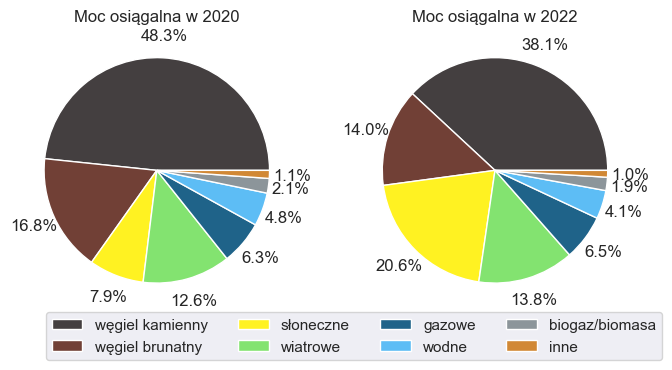

In [167]:
fig1, axs = plt.subplots(1, 2, figsize = (8,6))
#colors=sns.color_palette("RdGy",8)
#labels = df_moc['elektrownie']
colors = ["#443F40", "#714036", "#FFF222", "#83E370","#1F6389", "#5DBDF5", "#8C959A", "#D18835"]

values1 = df_moc['moc 2020']
axs[0].pie(values1, autopct='%1.1f%%', pctdistance=1.2, colors=colors)
axs[0].set_title('Moc osiągalna w 2020')


values2 = df_moc['moc 2022']
axs[1].pie(values2, autopct='%1.1f%%',pctdistance=1.2, colors=colors)
axs[1].set_title('Moc osiągalna w 2022')


plt.legend(df_moc['elektrownie'], loc="lower center", bbox_to_anchor=(0, -0.2), ncol=4)
plt.show()

In [154]:
page['Moc osiąglana w Polsce'] = f""" Przy analizie poziomu rezerwy i bliansu w systemie elektroenergtycznym należy zwrócić 
uwagę jak zmienia się mix energetycznych w odpowiedzi na aktualne tredny i wymagania Unii Europejskiej. 
Wzrost zapotrzebowania na energię elektryczną wymuszą zwiększenie mocy wytwóczych.
W 2022 moc osiągalna wzrosła o 8,6 GW (17%) osiągając poziom 58,9 GW, głównie dzięki budowie nowych Odnawialnych Źródeł Energii. """

In [155]:
page['Moc osiąglana w Polsce'] = fig1
                

In [156]:
page['Moc osiąglana w Polsce'][' '] = f""" Struktrę mocy osiągalnej w Krajowym Systemie Elektroenergetycznym w roku 2020 i 2022 przedstawiają 
poniższe wykresy. Największy udział w mocy mają elektrownie na węgiel kamienny ( 38%), energia słoneczna (21%), 
natomaist węgiel brunatny plasuje sie na trzecim miejscu (14%). 
Zauważalny jest wyraźny wzrost udziału źródeł fotowoltaicznych, 
natomiast spadek udziału źródeł węglowych. Na koniec roku 2020 moc źródeł fotowoltaicznych wynosiła niecałe 4 GW, 
natomiast do roku 2022 wzrosła trzykrotnie, do poziomu 12 GW. Rosnąca moc źródeł niesterowalnych wprowadza nowe wyzwania 
dla utrzymania odpowiedniego zbilansowania w sieci przesyłowej. Chociaż Polska szybko zbliża się do 60 GW mocy zainstalowanej, 
to pokrycie zapotrzebowania w wysokości 23 GW potrafi być problemem przy bezwietrznej pogodzie i znaczących ubytkach w elektrowniach węglowych.  """

In [157]:
page.save_html('Analiza rezerwy mocy w KSE.html')

In [19]:
os.listdir('plan_2023')

['plan_012023.csv',
 'plan_022023.csv',
 'plan_032023.csv',
 'plan_042023.csv',
 'plan_052023.csv',
 'plan_062023.csv',
 'plan_072023.csv',
 'plan_082023.csv',
 'plan_092023.csv',
 'plan_102023.csv',
 'plan_112023.csv',
 'plan_122023.csv']

In [20]:
csv_files = [file for file in os.listdir('plan_2023') if file.endswith('.csv')]

In [21]:
# lista do połączenia tabel w jedną dla całego roku
csv_data_list = [pd.read_csv('plan_2023/'+file, sep=';', encoding='iso-8859-1') for file in csv_files]

In [22]:
plan_2023_oryginal = pd.concat(csv_data_list, axis=0, ignore_index=True)

In [23]:
plan_2023 = plan_2023_oryginal.copy()
plan_2023.head()

,Doba,Godzina,Prognozowane zapotrzebowanie sieci,Wymagana rezerwa mocy OSP,Nadwy¿ka mocy dostêpna dla OSP (7) + (9) - [(3) - (12)] - (13),Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB,Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB dostêpna dla OSP,Przewidywana generacja JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB (3) - (9) - (12),Prognozowana generacja JW i magazynów energii nie wiadcz¹cych us³ug bilansuj¹cych w ramach RB,Prognozowana sumaryczna generacja róde³ wiatrowych,Prognozowana sumaryczna generacja róde³ fotowoltaicznych,Planowane saldo wymiany miêdzysystemowej,Prognozowana wielkoæ niedyspozycyjnoci wynikaj¹ca z ograniczeñ sieciowych wystêpuj¹cych w sieci przesy³owej oraz sieci dystrybucyjnej w zakresie dostarczania energii elektrycznej,Przewidywana generacja zasobów wytwórczych nieobjêtych obowi¹zkami mocowymi,Obowi¹zki mocowe wszystkich jednostek rynku mocy
0,2023-01-01,1,11823,1294,2713,14578,7 342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7 342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8 029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7 704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7 391,6088,6000,3246,0,-1555,0,9164,0


# Przygotowanie danch

In [24]:
# palety kolorów 

blue_colors = ['#2A5982', '#191970',  '#1A76FF',  '#28D6D6', 'blue', '#808080']

orange_colors = ['#556B2F', '#9ACD32', '#B8860B','#A52A2A', '#FF4500','#F0BE04']




In [25]:
# Przygotowanie danych 
plan_2023=plan_2023.rename(columns={'Prognozowane zapotrzebowanie sieci':'zap',
                                  'Wymagana rezerwa mocy OSP':'rezerwa',
                                    'Nadwy¿ka mocy dostêpna dla OSP (7) + (9) - [(3) - (12)] - (13)':'nadwyżki OSP',
                                    'Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB':'moc JW i mag w RB',
                                    'Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB dostêpna dla OSP':'moc JW i mag w RB OSP',
                                    'Przewidywana generacja JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB (3) - (9) - (12)':'gen JW i mag w RB',
                                    'Prognozowana generacja JW i magazynów energii nie wiadcz¹cych us³ug bilansuj¹cych w ramach RB':'gen JW i mag nie RB',
                                    'Prognozowana sumaryczna generacja róde³ wiatrowych':'gen wiatr',
                                    'Prognozowana sumaryczna generacja róde³ fotowoltaicznych':'gen PV',
                                    'Planowane saldo wymiany miêdzysystemowej':'wymiana',
                                    'Prognozowana wielkoæ niedyspozycyjnoci wynikaj¹ca z ograniczeñ sieciowych wystêpuj¹cych w sieci przesy³owej oraz sieci dystrybucyjnej w zakresie dostarczania energii elektrycznej':'niedyspozycje',
                                    'Przewidywana generacja zasobów wytwórczych nieobjêtych obowi¹zkami mocowymi':'gen JW nieobjętych OM',
                                    'Obowi¹zki mocowe wszystkich jednostek rynku mocy':'OM JRM',
                                 })
plan_2023.dtypes



Doba                     object
Godzina                   int64
zap                       int64
rezerwa                   int64
nadwyżki OSP              int64
moc JW i mag w RB         int64
moc JW i mag w RB OSP    object
gen JW i mag w RB         int64
gen JW i mag nie RB       int64
gen wiatr                 int64
gen PV                    int64
wymiana                   int64
niedyspozycje             int64
gen JW nieobjętych OM     int64
OM JRM                    int64
dtype: object

In [26]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM
0,2023-01-01,1,11823,1294,2713,14578,7 342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7 342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8 029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7 704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7 391,6088,6000,3246,0,-1555,0,9164,0


In [27]:
# usunięcie jakiegoś białego znaku i połączenie w jedne ciąg
plan_2023['moc JW i mag w RB OSP']=["".join(row.split()) for row in plan_2023['moc JW i mag w RB OSP']]

# zmiania object na int 
plan_2023['moc JW i mag w RB OSP'] = plan_2023['moc JW i mag w RB OSP'].astype('int')



# zmiania formatu dat
plan_2023['Doba'] = pd.to_datetime(plan_2023['Doba']) # zmieniamy, aby potem korzystać z funkcji datowych 


# usunięcie wiersza, których 'Godz.' == 25 - jak nadac nowe indeksy w meijsce usuniętych ?
plan_2023.drop(plan_2023[plan_2023['Godzina']==25].index, inplace=True)


plan_2023.dtypes

Doba                     datetime64[ns]
Godzina                           int64
zap                               int64
rezerwa                           int64
nadwyżki OSP                      int64
moc JW i mag w RB                 int64
moc JW i mag w RB OSP             int32
gen JW i mag w RB                 int64
gen JW i mag nie RB               int64
gen wiatr                         int64
gen PV                            int64
wymiana                           int64
niedyspozycje                     int64
gen JW nieobjętych OM             int64
OM JRM                            int64
dtype: object

In [28]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7391,6088,6000,3246,0,-1555,0,9164,0


# Analiza danych

In [29]:
# max zapotrzebowanie każdego dnia

plan_2023.groupby('Doba', as_index=False)['zap'].max()['zap']


0      15515
1      20276
2      20822
3      21685
4      21227
       ...  
360    24001
361    24094
362    23537
363    21140
364    17508
Name: zap, Length: 365, dtype: int64

In [30]:
#tu były wyliczeni ana średnie zapotrdzebowanie



In [31]:
# zap [GW]
plan_2023['zap GW'] = plan_2023['zap'] / 1000

# rezerwa [GW]
plan_2023['rezerwa GW'] = plan_2023['rezerwa'] / 1000



# dodadnie dni tygodnia

plan_2023['nr dnia tyg'] = plan_2023['Doba'].dt.weekday
plan_2023['dzień tyg']=plan_2023['Doba'].dt.day_name(locale= "pl_PL")

# dodanie pierwszego dnia miesiąca
plan_2023['month_start'] = plan_2023.Doba.dt.to_period('M').dt.to_timestamp()


#nazwa miesiąca 
plan_2023['miesiąc']=plan_2023['Doba'].dt.month_name(locale= "pl_PL")

#numer miesiąca 
plan_2023['nr miesiąca']=plan_2023['Doba'].dt.month


#dodanie miesięca w formacie daty
plan_2023['miesiąc data'] = plan_2023['Doba'].dt.strftime('%Y-%m')


# I wariant ) dodanie:prognozowana generacja JW i magazynów energii (generacja suma)" - suma generacji JW i pracy magazynów "
plan_2023['gen suma'] = plan_2023['moc JW i mag w RB OSP'] + plan_2023['gen JW i mag nie RB'] - plan_2023['niedyspozycje'] 
plan_2023.sample(3)

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,...,OM JRM,zap GW,rezerwa GW,nr dnia tyg,dzień tyg,month_start,miesiąc,nr miesiąca,miesiąc data,gen suma
2797,2023-04-27,15,20015,3603,4103,20570,20570,16467,3548,16,...,22848,20.015,3.603,3,Czwartek,2023-04-01,Kwiecień,4,2023-04,24118
1203,2023-02-20,4,14666,1508,6047,20041,11598,5551,9597,5562,...,0,14.666,1.508,0,Poniedziałek,2023-02-01,Luty,2,2023-02,21195
2118,2023-03-30,8,20425,3676,3525,19906,19906,16381,4044,4,...,23614,20.425,3.676,3,Czwartek,2023-03-01,Marzec,3,2023-03,23950


## 2. Prognozowane zapotrzebowanie i wymagana rezerwa mocy

In [32]:
#wykres_zap_gen = (plan_2023.groupby('miesiąc', as_index=False)[['zap', 'rezerwa']].sum())
wykres_zap_gen = (plan_2023.groupby(['miesiąc', 'miesiąc data'], as_index=False).sum()).sort_values(by = 'miesiąc data')

wykres_zap_gen.head()


C:\Users\Justyna\AppData\Local\Temp\ipykernel_21084\2887925076.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,miesiąc,miesiąc data,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,...,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM,zap GW,rezerwa GW,nr dnia tyg,nr miesiąca,gen suma
10,Styczeń,2023-01,9300,13731396,1377439,2336168,12301045,10610438,8259584,5426502,...,200671,45306,14681,7468050,7438410,13731.396,1377.439,2184,744,16022259
5,Luty,2023-02,8400,12622743,1262689,2560422,12695593,9868651,7207757,5248644,...,439106,166356,100483,6851709,7084200,12622.743,1262.689,2016,1344,15016812
7,Marzec,2023-03,9276,14200444,2198669,4306193,14830123,14437039,9998139,4145962,...,568515,56342,132745,3408509,8146830,14200.444,2198.669,2226,2229,18450256
2,Kwiecień,2023-04,9000,12918709,2325368,3756420,14258274,14258274,10448303,2470412,...,632217,0,53472,1515927,6511680,12918.709,2325.368,2280,2880,16675214
6,Maj,2023-05,9300,12532724,2255893,5133785,15906493,15906493,10615173,1917567,...,764886,0,157556,1315344,7197120,12532.724,2255.893,2088,3720,17666504


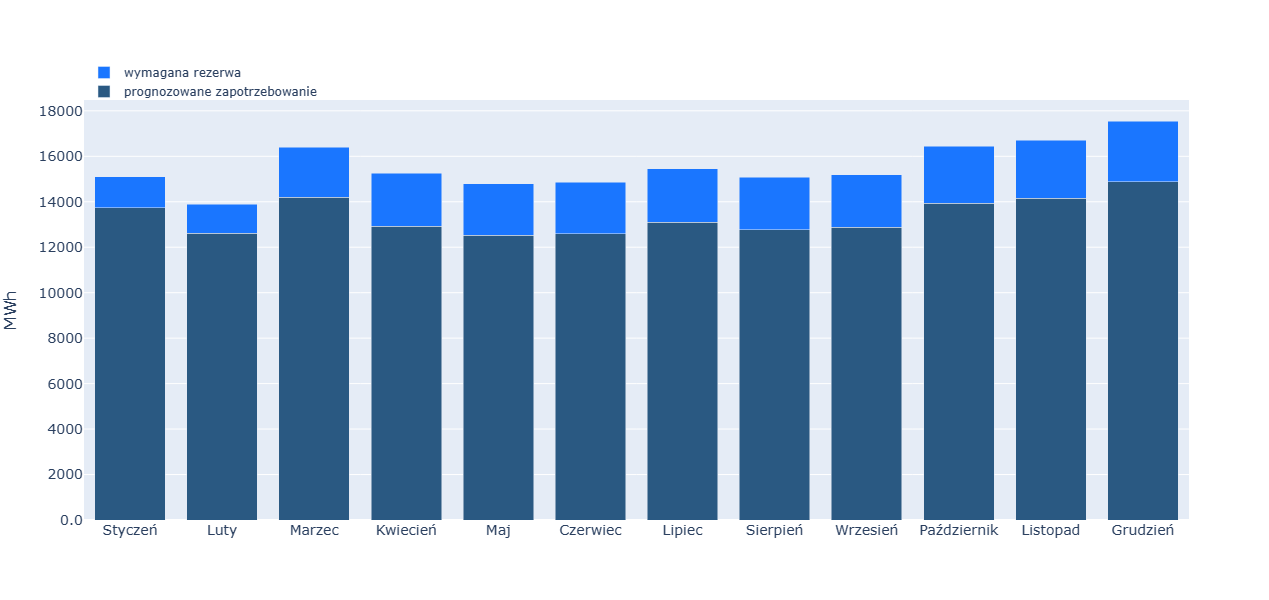

In [145]:
x = wykres_zap_gen['miesiąc']
zapotrzebowanie = wykres_zap_gen['zap GW']
generacja =  wykres_zap_gen['rezerwa GW']



fig2 = go.Figure(data=[
    go.Bar(name='prognozowane zapotrzebowanie', x=x, y=zapotrzebowanie, 
           marker_color='#2A5982'
          ),
    go.Bar(name='wymagana rezerwa', x=x, y=generacja, 
          marker_color='#1A76FF'
          )
])

fig2.update_layout(
    barmode='stack',
    width=1000,
    height=600,
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    #title='Krajowa miesięczna generacja i zapotrzebowanie',
    xaxis_tickfont_size=14,
    
    #xaxis=dict(
    #        dtick="M1",
    #tickformat="%b\n%Y"),
    
    yaxis=dict(
        title='MWh',
        titlefont_size=16,
        tickfont_size=14,
        tickformat=".2r"
    ),
    
    legend=dict(
        x=0,
        y=1.1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
        )
    )

fig2.show()

In [146]:
page['Prognozowane zapotrzebowanie i wymagana rezerwa mocy'] = fig2

In [151]:
page['Prognozowane zapotrzebowanie i wymagana rezerwa mocy']['   '] = f""" Na wykresie kolumnowym przedstawiono planowane zapotrzebowanie
na moc wraz z wymaganą rezerwą mocy w podziale miesięcznym. Poziom wymaganej nadwyżki mocy jest uzależniony od horyzontu planowania 
i dla planów opracowywanych w dobie D wynosi:
 dla dobry D oraz D+1: 9% (tu Styczeń i luty)
 Od doby D+2 do doby D+9 włącznie: 14% (tu pierwszy tydzień marca)
 Dla pozostałych dób horyzontu planowania począwszy od doby D+10: 18%. (tu pozostałe dni w roku)
 
 
 Powyższy wykres świadczy o sezonowości miesięcznej zapotrzebowania na moc, a co za tym idzie również wymaganej rezerwy. Miesięczne zużycie energii elektrycznej
 jest wyższe w sezonie zimowym (15 GWh w grudniu), natomiast niższe w sezonie letnim (13 GWh). 

"""

In [152]:
page.save_html('Analiza rezerwy mocy w KSE.html')

## 3. Przewidywane zapotrzebowanie na moc na rok w 2023

In [42]:
string = "2023-04-01"
formatting = "%Y-%m-%d"

warunek1 = datetime.strptime(string, formatting).date()
warunek1

datetime.date(2023, 4, 1)

In [43]:
string2 = "2023-09-30"
formatting2 = "%Y-%m-%d"

warunek2 = datetime.strptime(string2, formatting2).date()
warunek2

datetime.date(2023, 9, 30)

In [44]:
# dodanie sezonu lato, zima

for index, row in plan_2023.iterrows():
    if (row['Doba'] <warunek1) | (row['Doba']> warunek2):
        plan_2023.loc[index,'sezon'] = 'zima'
    else:
        plan_2023.loc[index,'sezon'] = 'lato'
        

C:\Users\Justyna\AppData\Local\Temp\ipykernel_21084\1431994918.py:4: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

C:\Users\Justyna\AppData\Local\Temp\ipykernel_21084\1431994918.py:4: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [45]:
#średnie zapotrzebowanie 

#srednie godziny z całego roku
srednie_godz=plan_2023.groupby('Godzina', as_index=False)['zap'].mean()

#srednie godziny z lata
lato = plan_2023[ (plan_2023['Doba']>='2023-04-01') & (plan_2023['Doba']<='2023-09-30') ]
srednie_godz_lato=lato.groupby('Godzina', as_index=False)['zap'].mean()

#srednie godziny z zimy
zima = plan_2023[ (plan_2023['Doba']<'2023-04-01') | (plan_2023['Doba']>'2023-09-30') ]
srednie_godz_zima=zima.groupby('Godzina', as_index=False)['zap'].mean()
#kolory rgb(26, 118, 255), rgb(55, 83, 109)

In [46]:
srednie_godz_zima2 =zima.groupby(['miesiąc data', 'miesiąc','Godzina'], as_index=False)['zap'].mean().sort_values(by='miesiąc data')
srednie_godz_lato2 =lato.groupby(['miesiąc data', 'miesiąc','Godzina'], as_index=False)['zap'].mean().sort_values(by='miesiąc data')

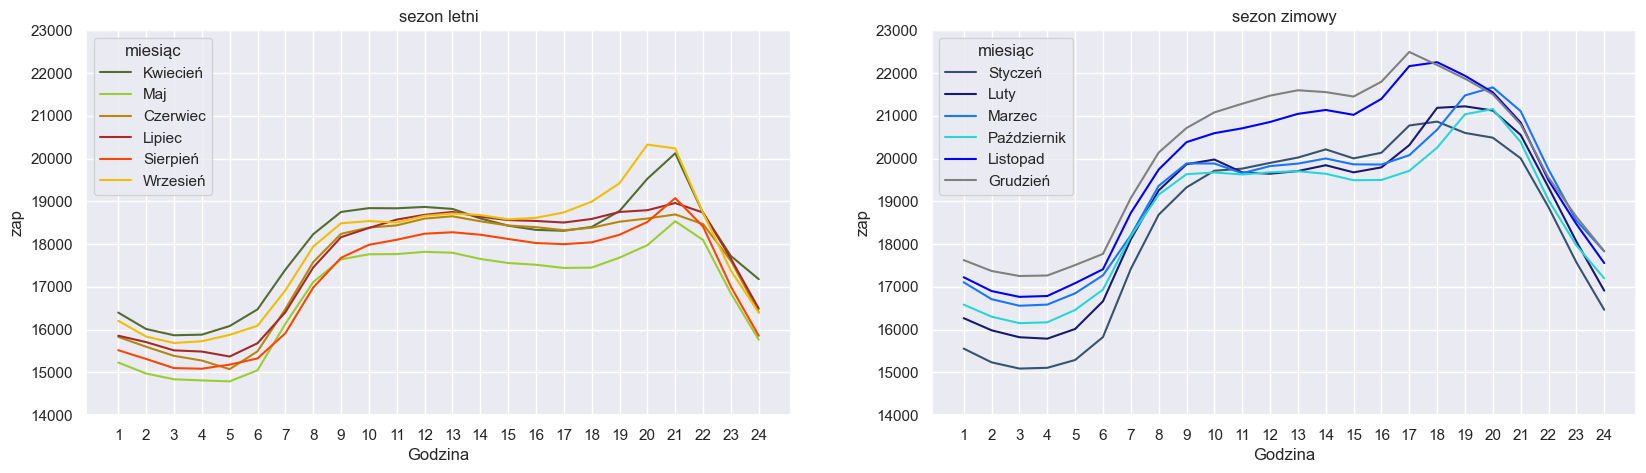

In [47]:
data = srednie_godz_lato2
dayList  = srednie_godz_lato2['Godzina']
godziny = range(1,25) 

sns.set()

fig3, ax = plt.subplots(1,2, figsize=(20,5))


blue_colors = ['#37536D', '#191970',  '#1A76FF',  '#28D6D6', 'blue', '#808080']

orange_colors = ['#556B2F', '#9ACD32', '#B8860B','#A52A2A', '#FF4500','#F0BE04']
#palette = sns.color_palette("mako_r", 6)



sns.lineplot(
    data=srednie_godz_lato2,
    x='Godzina',
    y='zap',
    hue='miesiąc',
    palette=orange_colors,
    ax=ax[0]
)

sns.lineplot(
    data=srednie_godz_zima2,
    x='Godzina',
    y='zap',
    hue='miesiąc',
    palette=blue_colors,
    ax=ax[1]
)


ax[0].set_title("sezon letni")
ax[1].set_title("sezon zimowy")

ax[0].set_xticks(godziny)
ax[1].set_xticks(godziny)

ax[0].set_ylim(14000, 23000)
ax[1].set_ylim(14000, 23000)

plt.show()

In [48]:
lato.query("Godzina >= 19 & Godzina <= 22")['zap'].max()


22189

In [49]:
lato['zap'].min()


11928

In [50]:
lato['zap'].max()

22189

In [51]:
zima['zap'].min()

10131

In [52]:
zima['zap'].max()

24809

In [100]:
page['Przewidywane zapotrzebowanie na moc w roku w 2023'] = fig3

page['Przewidywane zapotrzebowanie na moc w roku w 2023'][' '] = f"""
Zapotrzebowanie na mocy wykazuje również bardzo wyraźną zmienność godzinową. W sezonie letnim różnica między zużyciem 
minimalnym {lato['zap'].min()} MW, a maksymalnym {lato['zap'].max()} MW, wynosi {lato['zap'].max() - lato['zap'].min()} MW. W sesonie zimowym zapotrzebowanie
osiąga wyższe wartości, minimalne 
zużycie wynosiło {zima['zap'].min()} MW, a maksymalne {zima['zap'].max()} MW, co daje różnicę równą {zima['zap'].max() - zima['zap'].min()} MW. Tak znaczne 
wahania w układzie dobowo-godzinowym będą miały wpływ na wielkość rezerwy mocy i regulacyjne
usługi systemowe. Na obu wykresach rysuje się podział na doliny nocną i południową oraz szczyty poranny i wieczorny.
Szczyt wieczorny występuje:
latem od 19:00 do 22:00, 
zimą od 16:00 do 21:00. 
Szczyt poranny: 
latem i zimą od 7:00 do 13:00. 
Dolina południowa: 
latem: od 13:00 do 19:00, 
zimą od 14:00 do 16:00. 
"""

page.save_html('Analiza rezerwy mocy w KSE.html')

## 4. Niedobór mocy

niedobór wymaganej nadwyżki mocy (niedobór mocy) = wymagana rezerwa - nadwyżka mocy dostępna dla OSP
wymagana rezerwa w KSE to 9% planowanego (prognozowanego przez OSP) zapotrzebowania do pokrycia przez elektrownie krajowe



In [54]:
plan_2023['Niedobór mocy'] = plan_2023['rezerwa'] - plan_2023['nadwyżki OSP']

In [55]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,...,rezerwa GW,nr dnia tyg,dzień tyg,month_start,miesiąc,nr miesiąca,miesiąc data,gen suma,sezon,Niedobór mocy
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,...,1.294,6,Niedziela,2023-01-01,Styczeń,1,2023-01,15645,zima,-1419
1,2023-01-01,2,11031,1280,1615,14578,7342,5727,6956,4059,...,1.280,6,Niedziela,2023-01-01,Styczeń,1,2023-01,14298,zima,-335
2,2023-01-01,3,11018,1286,183,15266,8029,7846,4826,2091,...,1.286,6,Niedziela,2023-01-01,Styczeń,1,2023-01,12855,zima,1103
3,2023-01-01,4,10678,1259,305,14940,7704,7399,5050,2296,...,1.259,6,Niedziela,2023-01-01,Styczeń,1,2023-01,12754,zima,954
4,2023-01-01,5,10534,1230,1303,14627,7391,6088,6000,3246,...,1.230,6,Niedziela,2023-01-01,Styczeń,1,2023-01,13391,zima,-73


In [56]:
# jeśli chcemy grupowac po miesiącach 

po_miesiacach=(
    plan_2023
    .assign(miesiąc = lambda x: x['Doba'].dt.strftime('%Y-%m'))
    .groupby('miesiąc', as_index=False).mean()
    
)


C:\Users\Justyna\AppData\Local\Temp\ipykernel_21084\3814392234.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [57]:
niedobór_dobowy_max = (plan_2023[plan_2023['Niedobór mocy']>0]
                       .groupby('Doba', as_index=False).sum()
                       .sort_values('Niedobór mocy', ascending=False)[['Doba','Niedobór mocy']])
niedobór_dobowy_max

C:\Users\Justyna\AppData\Local\Temp\ipykernel_21084\1885063147.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Doba,Niedobór mocy
57,2023-04-18,35584
155,2023-12-13,25418
156,2023-12-14,25209
53,2023-04-12,24487
154,2023-12-12,23929
...,...,...
7,2023-01-17,27
28,2023-02-23,26
87,2023-09-05,16
3,2023-01-10,14


In [58]:
niedobór_dobowy_max.iloc[0,1]

35584

In [59]:
niedobór_dobowy_max.iloc[0,0]

Timestamp('2023-04-18 00:00:00')

###  wykres Niedobór mocy 

In [60]:
plan_2023['dzień tygodnia'] = plan_2023['Doba'].dt.day_name(locale= "pl_PL")


In [61]:
# dodanie weekendu
for index, row in plan_2023.iterrows():
    if (row['dzień tygodnia'] == 'Sobota') | (row['dzień tygodnia'] == 'Niedziela'):
        plan_2023.loc[index,'weekend'] = 'weekend'
    else:
        plan_2023.loc[index,'weekend'] = 'dzień roboczy'

In [62]:
plan_2023.sample(5)

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,...,dzień tyg,month_start,miesiąc,nr miesiąca,miesiąc data,gen suma,sezon,Niedobór mocy,dzień tygodnia,weekend
4073,2023-06-19,19,20568,3702,2964,21700,21700,18509,2059,18,...,Poniedziałek,2023-06-01,Czerwiec,6,2023-06,23532,lato,738,Poniedziałek,dzień roboczy
7720,2023-11-18,17,20627,3713,5830,22874,22874,17044,3583,25,...,Sobota,2023-11-01,Listopad,11,2023-11,26457,zima,-2117,Sobota,weekend
5913,2023-09-04,11,19414,3495,5330,21499,21499,16169,3245,8,...,Poniedziałek,2023-09-01,Wrzesień,9,2023-09,24744,lato,-1835,Poniedziałek,dzień roboczy
4215,2023-06-25,17,14114,2541,8932,20555,20555,11623,2491,10,...,Niedziela,2023-06-01,Czerwiec,6,2023-06,23046,lato,-6391,Niedziela,weekend
1170,2023-02-18,19,18919,1885,957,20812,11940,10625,8426,4223,...,Sobota,2023-02-01,Luty,2,2023-02,20008,zima,928,Sobota,weekend


In [206]:
niedobory = plan_2023[plan_2023['Niedobór mocy']>0]
niedobory['Niedobór mocy'].count()
ile_razy_wstapily_niedobory_prct=niedobory['Niedobór mocy'].count()/8760
ile_razy_wstapily_niedobory_prct.round(2)

1490

0.17

In [64]:
suma_niedoborów = niedobory['Niedobór mocy'].sum()
suma_niedoborów

1017160

In [65]:
suma_niedoborów_weekend = niedobory[niedobory['weekend']=='weekend']['Niedobór mocy'].sum()

In [66]:
niedobory_weekend_pct = suma_niedoborów_weekend/suma_niedoborów
niedobory_weekend_pct

0.011055291202957254

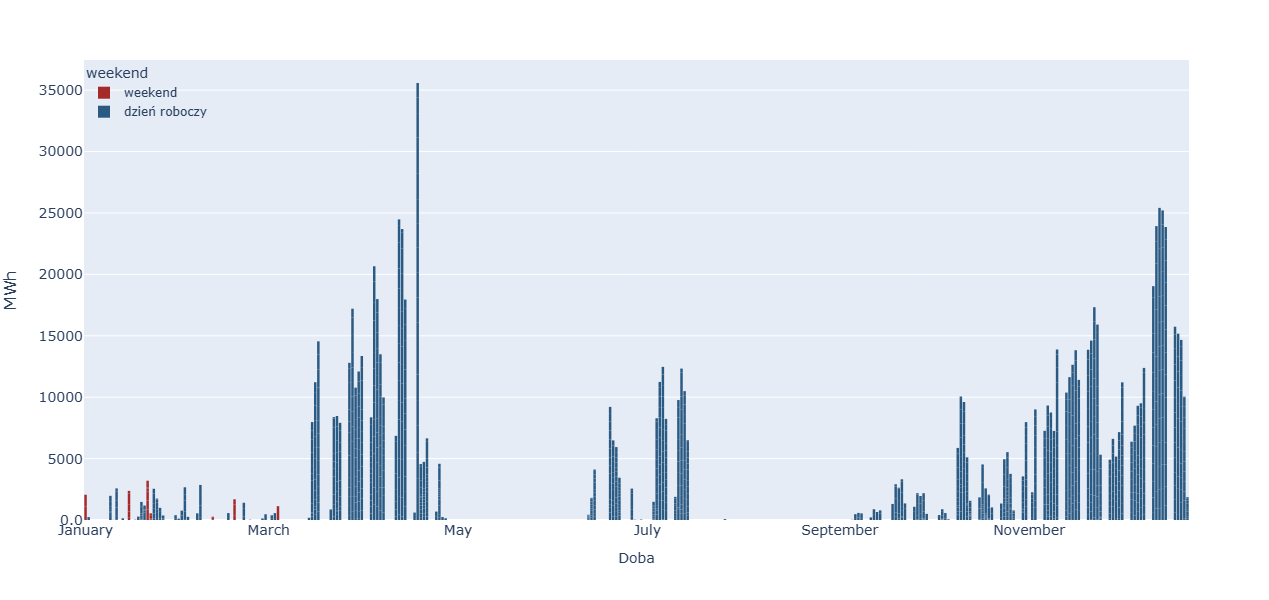

In [168]:
niedobory = plan_2023[plan_2023['Niedobór mocy']>0]
dayList  = niedobory['Doba']
y_niedobór = niedobory['Niedobór mocy']
y_rezerwa = niedobory['rezerwa']
y_nadwyżki = niedobory['nadwyżki OSP']
color = niedobory['weekend']

blue_colors = ['#40719C', '#191970',  '#1A76FF',  '#28D6D6', 'blue', '#808080']

orange_colors = ['#556B2F', '#9ACD32', '#B8860B','#A52A2A', '#FF4500','#F0BE04']




fig4 = px.bar(niedobory, x=dayList, y=y_niedobór, color=color, 
              color_discrete_sequence=[ "#A52A2A", '#2A5982']
             )


fig4.update_layout(
    xaxis_tickfont_size=14,
        width=1000,
    height=600,
    
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
        ),


    yaxis=dict(
        title='MWh',
        titlefont_size=16,
        tickfont_size=14,
        tickformat=".2r"),
    
        xaxis=dict(
        tickfont_size=14,
        tickformat='%B'

        ),
    )


fig4.update_traces(
    #marker_color='rgb(26, 118, 255)', 
    #marker_line_color='rgb(26, 118, 255)',
     marker_line_width=0.01, 
    #opacity=0.6




)

fig4.show()

In [214]:
page['Niedobór mocy'] = fig4

page['Niedobór mocy'][' '] = f"""
Wykres przedstawia przewidywane niedobory mocy w rozkładzie dobowym. W 2023 Operator Systemu Przesyłowego zmierzy się z niedoborami mocy 
sięgającymi łącznie {suma_niedoborów} MW. Najwyższe i najcześciej występujące niedobory 
przewidywane są w od początku roku do kwietnia, w czerwcu oraz od września do grudnia. Przewiduje się, że podczas {niedobory['Niedobór mocy'].count()} godzin w roku 
w systemie nie będzie wystarczającej ilości rezerw, co stanowi {ile_razy_wstapily_niedobory_prct.round(2):.0%}.
W dniu 18.04.22023 system zmierzy się z najwyższym niedobrem wynoszącym {niedobór_dobowy_max.iloc[0,1]} MWh
sumarycznie w ciągu doby. W weekendy istnieje niewielkie ryzyko wystąpienia zagrożenia w systemie, ponieważ niedobory mocy w tym czasie
stanowią jedynie {niedobory_weekend_pct:.0%}.
Pamiętając, że dane za okres styczeń-luty prezentują 
już zbilansowany system, widoczna jest sezonowość, dlatego w dalszej części niedobory będą poddane analizie w podziale na sezon 
letni oraz zimowy. 
"""

page.save_html('Analiza rezerwy mocy w KSE.html')

## 5. Niedobór mocy - rozkład godzinowy

In [69]:
niedobory = plan_2023[plan_2023['Niedobór mocy']>0]

In [178]:
niedobór_godziny=(
    niedobory
    .groupby('Godzina')
    .aggregate({'Niedobór mocy':['sum','max', 'min', 'count', 'median']})
    .sort_values(by = ('Niedobór mocy','count'), ascending = False)
)
tab = niedobór_godziny.head()
tab

Niedobór mocy                       
                  sum   max min count median
Godzina                                     
20             101993  2114  23   130  774.5
19              94030  2006  32   119  801.0
21              79441  2900  15   115  580.0
18              82823  2007   5   114  732.5
17              80298  2073  16   106  726.0

In [171]:
niedobory_wieczor = niedobór_godziny.query("Godzina >= 17 & Godzina <= 20")

In [172]:
niedobory_wieczor_min =niedobory_wieczor[('Niedobór mocy', 'median')].min()

In [173]:
niedobory_wieczor_max =niedobory_wieczor[('Niedobór mocy', 'median')].max()

In [174]:
niedobór_godziny.columns

MultiIndex([('Niedobór mocy',    'sum'),
            ('Niedobór mocy',    'max'),
            ('Niedobór mocy',    'min'),
            ('Niedobór mocy',  'count'),
            ('Niedobór mocy', 'median')],
           )

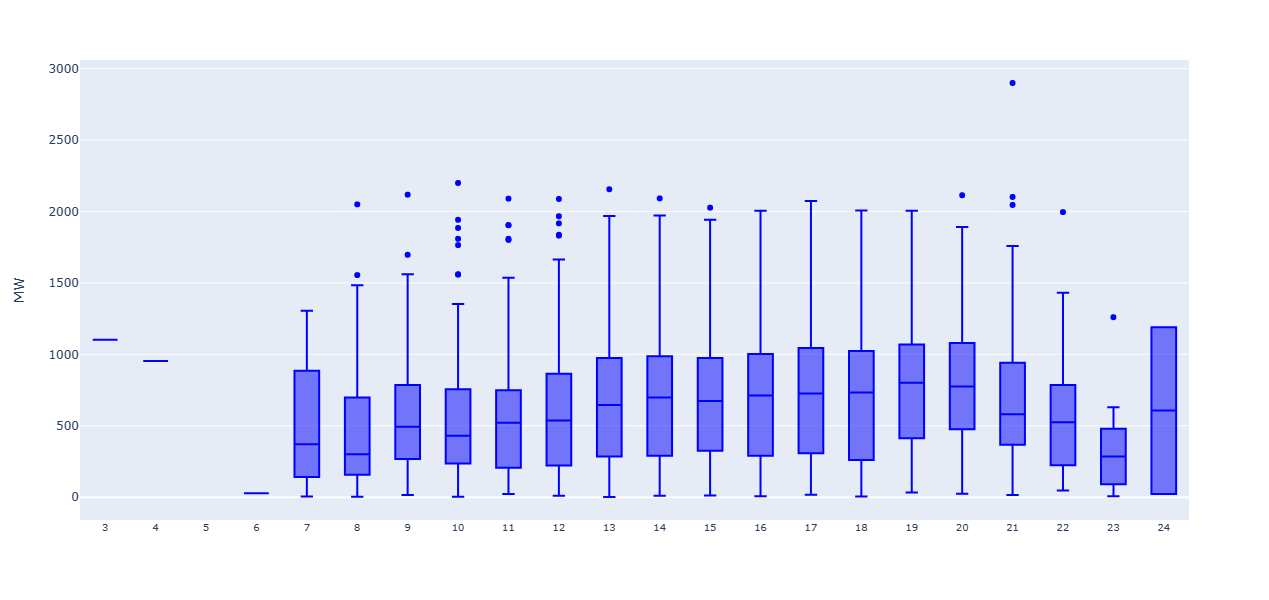

In [175]:
fig5 = px.box(niedobory, x='Godzina', y='Niedobór mocy', 
              color_discrete_sequence=['blue'])


#40719C
fig5.update_layout(
    width=1000,
    height=600,
    #title='Niedobór mocy',
    xaxis_tickfont_size=10,
    yaxis_title='MW',
    xaxis_title='',
    xaxis_dtick=1
)

fig5.show()

In [181]:
page['Niedobór mocy w rozkładzie godzinowym'] = fig5

page['Niedobór mocy w rozkładzie godzinowym'][' '] = f"""
Wykres pudełkowy przedstawia godzinny rozkład niedoborów mocy, z którego wynika, że występują one tylko w ciągu dnia, z największymi wartościami 
w godzina popołudniowych, czyli w trakcie wieczornego szczytu zapotrzebowania. Mediana w godzianch 17-20 waha się w przedziale od {niedobory_wieczor_min} do
{niedobory_wieczor_max} MW. Największy rozrzut pomiędzy kwartylami jest dla godziny 24, natomiast niedobory o najbardziej zbliżonych do siebie wartościach
wstępują o godzinie 23. 
"""

page.save_html('Analiza rezerwy mocy w KSE.html')

## 6. Niedobór mocy w godzinach szczytu

In [80]:
niedobory_godz_szczyt = niedobory.query("Godzina >= 17 & Godzina <= 21")

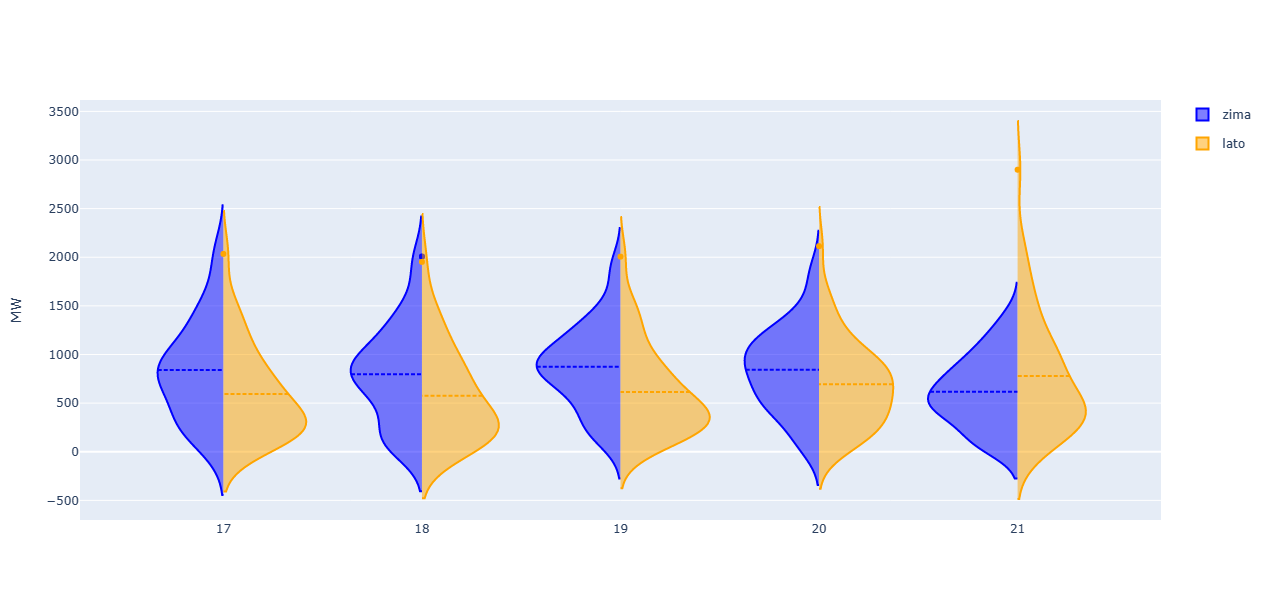

In [81]:
df = niedobory_godz_szczyt

fig6 = go.Figure()


#["#40719C", "#F0BE04"])

fig6.add_trace(go.Violin(x=df['Godzina'][ df['sezon'] == 'zima' ],
                        y=df['Niedobór mocy'][ df['sezon'] == 'zima' ],
                        legendgroup='Yes', scalegroup='Yes', name='zima',
                        side='negative',
                        line_color='blue')
             )
fig6.add_trace(go.Violin(x=df['Godzina'][ df['sezon'] == 'lato' ],
                        y=df['Niedobór mocy'][ df['sezon'] == 'lato' ],
                        legendgroup='No', scalegroup='No', name='lato',
                        side='positive',
                        line_color='orange')
             )
fig6.update_traces(meanline_visible=True)

fig6.update_layout(violingap=0, 
                   violinmode='overlay',
                    width=1000,
                    height=600,
                    #title='Niedobór mocy',
                    #xaxis_tickfont_size=10,
                    yaxis_title='MW',
                    #xaxis_title='',
                    #xaxis_dtick=1
                  )

fig6.update_traces(width=0.9)


fig6.show()

In [184]:
page['Niedobór mocy w godzinach szczytu'] = fig6

page['Niedobór mocy w godzinach szczytu'][' '] = f"""
W związku z tym, że problemy z zapewnieniem wymaganej rezerwy występują przede wszystkich w godzinach szczytu wieczornego, na wykresie skrzypcowym przestawiono dla nich szczegółowe
dane statystyczne. Oprócz wartoście niedoborów możemy zaobserwować jak często one występują, co odzwierciedla grubość każdego elementu. W godzinach 17-18 w 
okresie letnim niedobory występują częściej, ale mają mniejsze wartości w porównaiu z sezonem zimowym. O godzinie 21 wartości niedoborów są zbliże, ale częściej
wstępują w zimie, nastomiast latem rozrzut wartości jest większy. W godzinie 20 niedobory wystepują najczęściej, bo 130 razy, co stanowi ponad połowę wszystkich dni roboczych 
w roku. 

"""
page['Niedobór mocy w godzinach szczytu']['tabela'] = tab
page.save_html('Analiza rezerwy mocy w KSE.html')

## 7. nadwyżki mocy %

In [83]:
plan_2023['nadwyżki OSP %'] = plan_2023['nadwyżki OSP'] / plan_2023['zap']

In [84]:
plan_2023['rezerwa %'] = plan_2023['rezerwa'] / plan_2023['zap']

In [85]:
niedobory = plan_2023[plan_2023['Niedobór mocy']>0]


In [191]:
godz_7_22_niedobory = niedobory.query("Godzina >= 7 & Godzina <= 22")
prct_min=(godz_7_22_niedobory['nadwyżki OSP %'].mean()*100).round()
prct_min

14.0

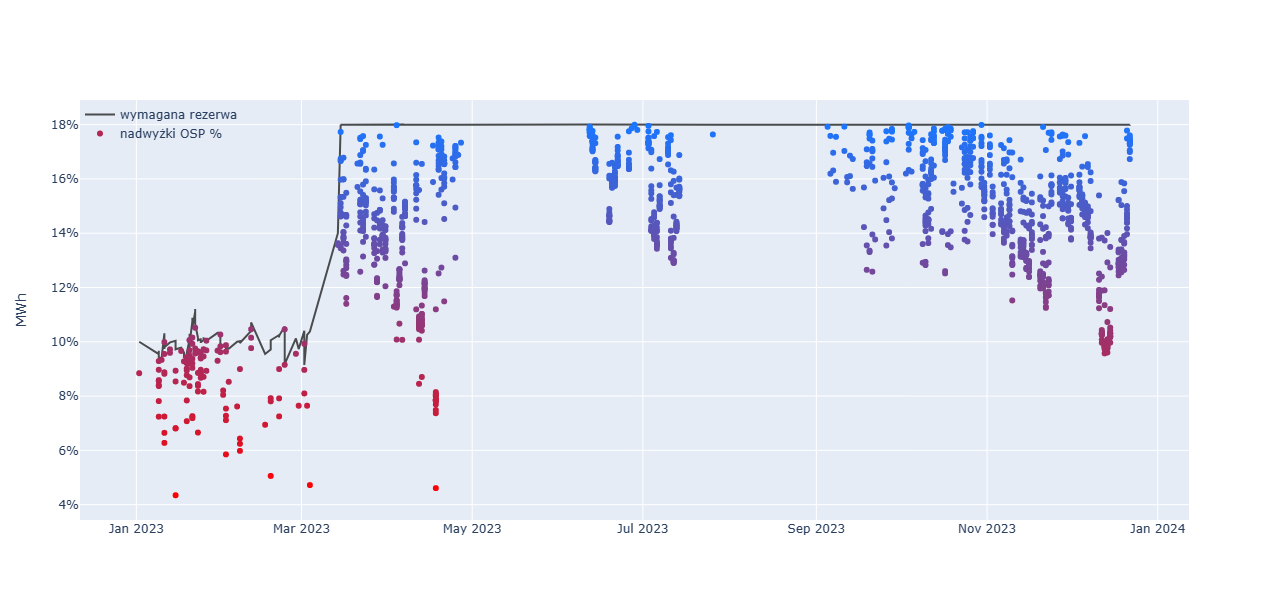

In [198]:
x = godz_7_22_niedobory['Doba']
y_nadwyżki = godz_7_22_niedobory['nadwyżki OSP %']
y_rezerwa = godz_7_22_niedobory['rezerwa %']

fig7 = go.Figure()
fig7.add_trace(go.Scatter(x=x, y=y_rezerwa,
                    mode='lines',
                    name='wymagana rezerwa',
                         marker_color='#4A4B4D'))
fig7.add_trace(go.Scatter(x=x, y=y_nadwyżki,
                    mode='markers', name='nadwyżki OSP %',    marker = dict(
        colorscale=['red', '#1A76FF']
                  #Bluered_r      
    ), marker_color=y_nadwyżki))


fig7.update_layout(
    width=1000,
    height=600,
    #title='Krajowa miesięczna generacja i zapotrzebowanie',
    #xaxis_tickfont_size=14,
    
    #xaxis=dict(
    #        dtick="M1",
    #tickformat="%b\n%Y"),
        
    
    
    yaxis=dict(
        title='MWh',
        #titlefont_size=16,
        #tickfont_size=14,
        tickformat=".0%"
    ),
    
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
        )
    )

fig7.show()

In [192]:
page['Nadwyżki mocy %'] = fig7

page['Nadwyżki mocy %'][' '] = f"""
Powyższy wykres przedstawia poziom wymaganej rezerwy w systemie wraz z umiejscowieniem nadwyżek mocy dostępnych dla OSP, które niespełniając wymaganej 
rezerwy stanowią niedobór mocy. 
W planie Koordynacyjnym poziom wymaganej nadwyżki mocy jest uzależniony od horyzontu planowania, dlatego w miesiącach styczeń i luty nie przekraczają 10% 
przewidywanego zapotrzebowania.
Dla planów opracowywanych z dużym wyprzedzeniem wymóg to rezerwa stanowiąca 18%. Średni procentowy poziom niedoborów mocy to
{prct_min}%. Kropki oznaczone kolorem czerwonym oznaczać mogą potencjalne zagrożenie w sieci, ponieważ nie spełniają limitu wymaganej rezerwy.
Z analizy wynika, że nie przewiduje się, aby rezerwy mogłyby spaść poniżej prognozowanego zapotrzebowania.
"""

page.save_html('Analiza rezerwy mocy w KSE.html')

## 8. Korelacja między zmiennymi 

In [89]:
plan_szczyt = plan_2023.query("weekend == 'dzień roboczy' & Godzina >= 17 & Godzina <= 21")
plan_szczyt.sample(5)

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,...,miesiąc,nr miesiąca,miesiąc data,gen suma,sezon,Niedobór mocy,dzień tygodnia,weekend,nadwyżki OSP %,rezerwa %
3112,2023-05-10,18,18989,3418,5048,22010,22010,16490,2500,25,...,Maj,5,2023-05,24038,lato,-1630,Środa,dzień roboczy,0.265838,0.179999
8275,2023-12-11,20,23088,4156,2750,22200,22200,19450,3638,28,...,Grudzień,12,2023-12,25838,zima,1406,Poniedziałek,dzień roboczy,0.119109,0.180007
6811,2023-10-11,21,21556,3880,3091,21781,21781,18690,2866,38,...,Październik,10,2023-10,24647,zima,789,Środa,dzień roboczy,0.143394,0.179996
1747,2023-03-14,20,22834,3197,3098,21693,21693,18595,4239,37,...,Marzec,3,2023-03,25932,zima,99,Wtorek,dzień roboczy,0.135675,0.140011
4627,2023-07-12,21,20542,3698,2672,21811,21811,19090,1452,10,...,Lipiec,7,2023-07,23214,lato,1026,Środa,dzień roboczy,0.130075,0.180021


C:\Users\Justyna\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



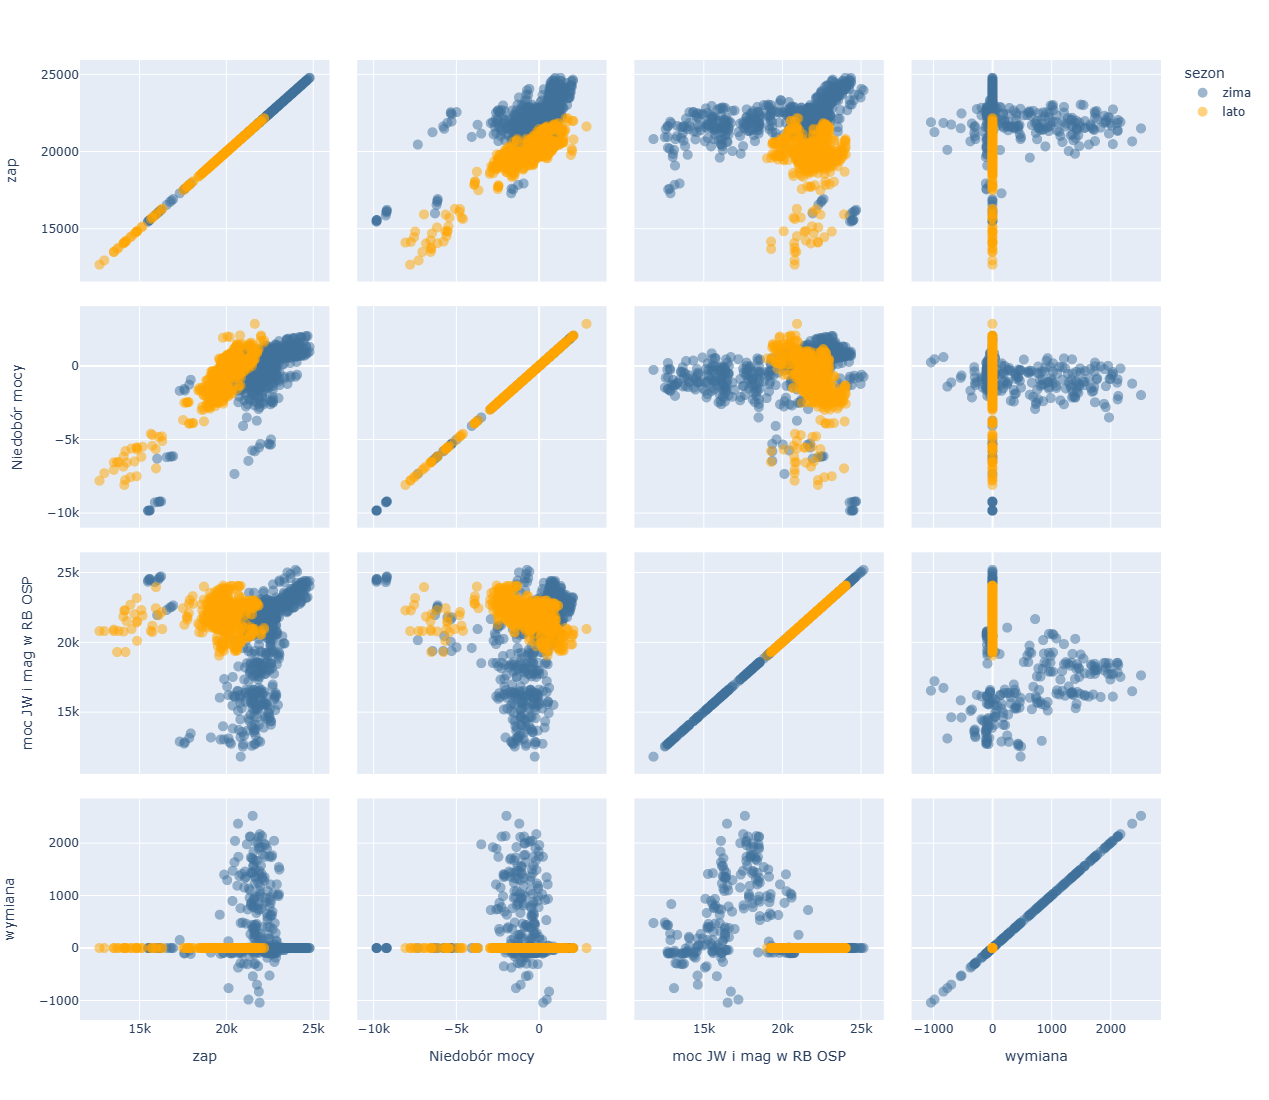

In [201]:
df = plan_szczyt

fig8 = px.scatter_matrix(df, dimensions=[ "zap",'Niedobór mocy', "moc JW i mag w RB OSP", "wymiana"], color="sezon", 
                         color_discrete_sequence=["#40719C", "orange"], opacity=0.5)

#F0BE04

fig8.update_layout(
    width=1100,
    height=1100,
    yaxis_tickformat='.3r'


)







fig8.update_traces( marker_size=10)

fig8.show()

In [141]:
page['Korelacja między danymi'] = fig8

page['Korelacja między danymi'][' '] = f"""
Spośród zaprezetowanych wykresów wyróżnia się ścisła korelacja pomiędzy niedoborem mocy, a przewidywanym zapotrzebowaniem, co również
 udowodniły wyniki przedstawione na początku tej analizy. 
 Dodatkowo zaobserwować można, że moc Jednostek Wytwórczych i magazynów dostepnych dla OSP warunkuje planowaną wymianę międzysystemową w sezonie zimowym. 
 W sezonie letnim saldo wymiany wynosi 0 natomiast 
 w sezonei letnim taka zależność nie występuje. Moce Jednostek Wytwóeczych wpływają wyraźnie na dostępne rezerwy w systemie głównie w sezonie letnim, co spowodowane jest 
 zwiększjącym sie udziałem źródeł fotowoltaicznych w misie energetycznym. 
"""

page.save_html('Analiza rezerwy mocy w KSE.html')

## 8. Podsumowanie

In [215]:
page['Podsumowanie'] = f"""
Z nieniejszej analizy wynika, że wg 5-letniego Kalnu Koordynacyjnego, PSE zakłada, że krajowa generacja zawsze pokryje prognozowane zapotrzebowanie
na energię elektryczną, ale ok 17% czasu bedzie obarczone ryzykiem nieposiadania wystarczających rezerw w systemie. Brak rezerw oznacza możliwość wystąpienia 
zagrożenia, jakim może być w najgorzy scenariuszu blackout. Jednak w 2023 roku już miały miejsce dni, w których rezerwy były niewystarczające, jednak zawsze osiągały min 4%. 
Największy wpływ na poziom rezerw ma zapotrzebowanie, dlatego tak ważne jest, aby inwestować w rozwiązania służące zwiększaniu elastyczności systemu elektroenergetycznego.
Wśród rekomendowanych do wdrożenia mechanizmów rynkowego stymulowania zachowań odbiorców są np, wprowadzenie taryf dynamicznych czy rozwój usług DSR. Dodatkowo należy inwestować
w magazynowanie energii, w celu przesuwania profilu z godzin popołudniowych na pozostałe godziny doby. 

"""

page.save_html('Analiza rezerwy mocy w KSE.html')